### Subajuste y sobreajuste

Descubrimos que, en cuanto a la exactitud, nuestro modelo funciona mejor con el conjunto de entrenamiento, en comparación con el conjunto de prueba. Este suele ser el caso del machine learning. Pero, ¿por qué?

El modelo no tuvo problemas con las observaciones del conjunto de entrenamiento, pero sí con el conjunto de prueba. Este es un síntoma de sobreajuste.

Es posible que hayas enfrentado un problema similar. El sobreajuste es como estudiar demasiado para un examen. Puedes memorizar libros de texto completos, palabra por palabra, pero si te enfocas demasiado en el material del libro, el conocimiento será inútil en una prueba donde se te presenten preguntas que nunca antes habías visto. No serás capaz de responderlas si no puedes ver el contexto completo, de la misma forma que un modelo no podrá trabajar correctamente en el problema general si entrena demasiado para categorizar perfectamente un conjunto de datos particular.

Entrena demasiado un modelo y detectará las fluctuaciones y desviaciones más pequeñas que provienen del ruido aleatorio, en lugar de las relaciones de causa y efecto realmente existentes. Un modelo sobreajustado comenzará a ver dependencias que en realidad no existen. Intentará aplicar estas dependencias inexistentes a nuevos datos que podrían clasificarse mediante una regla más simple y general.

El subajuste es lo contrario. Ocurre cuando la exactitud es baja y aproximadamente igual tanto para el conjunto de entrenamiento como para el de prueba. Eso es como no tener suficiente tiempo para leer todo el material de estudio, y mucho menos para memorizar las respuestas. ¿Te suena familiar?

El sobreajuste significa que el modelo tiene una comprensión deficiente de las dependencias de datos.

Correcto. Al igual que quemarse las pestañas para un examen: el modelo memoriza todas las respuestas correctas, pero no logra captar la idea general.

No siempre es posible evitar el sobreajuste o el subajuste. Cuando mejoras en uno de estos, aumenta el riesgo del otro.

Revisa este ejemplo de excelente ajuste de un algoritmo de entrenamiento. ¿Cómo afecta al equilibrio entre el sobreajuste y el subajuste? La profundidad del árbol (altura) es la cantidad máxima de condiciones desde la "parte superior" del árbol hasta la respuesta final, según la cantidad de transiciones de nodo a nodo.

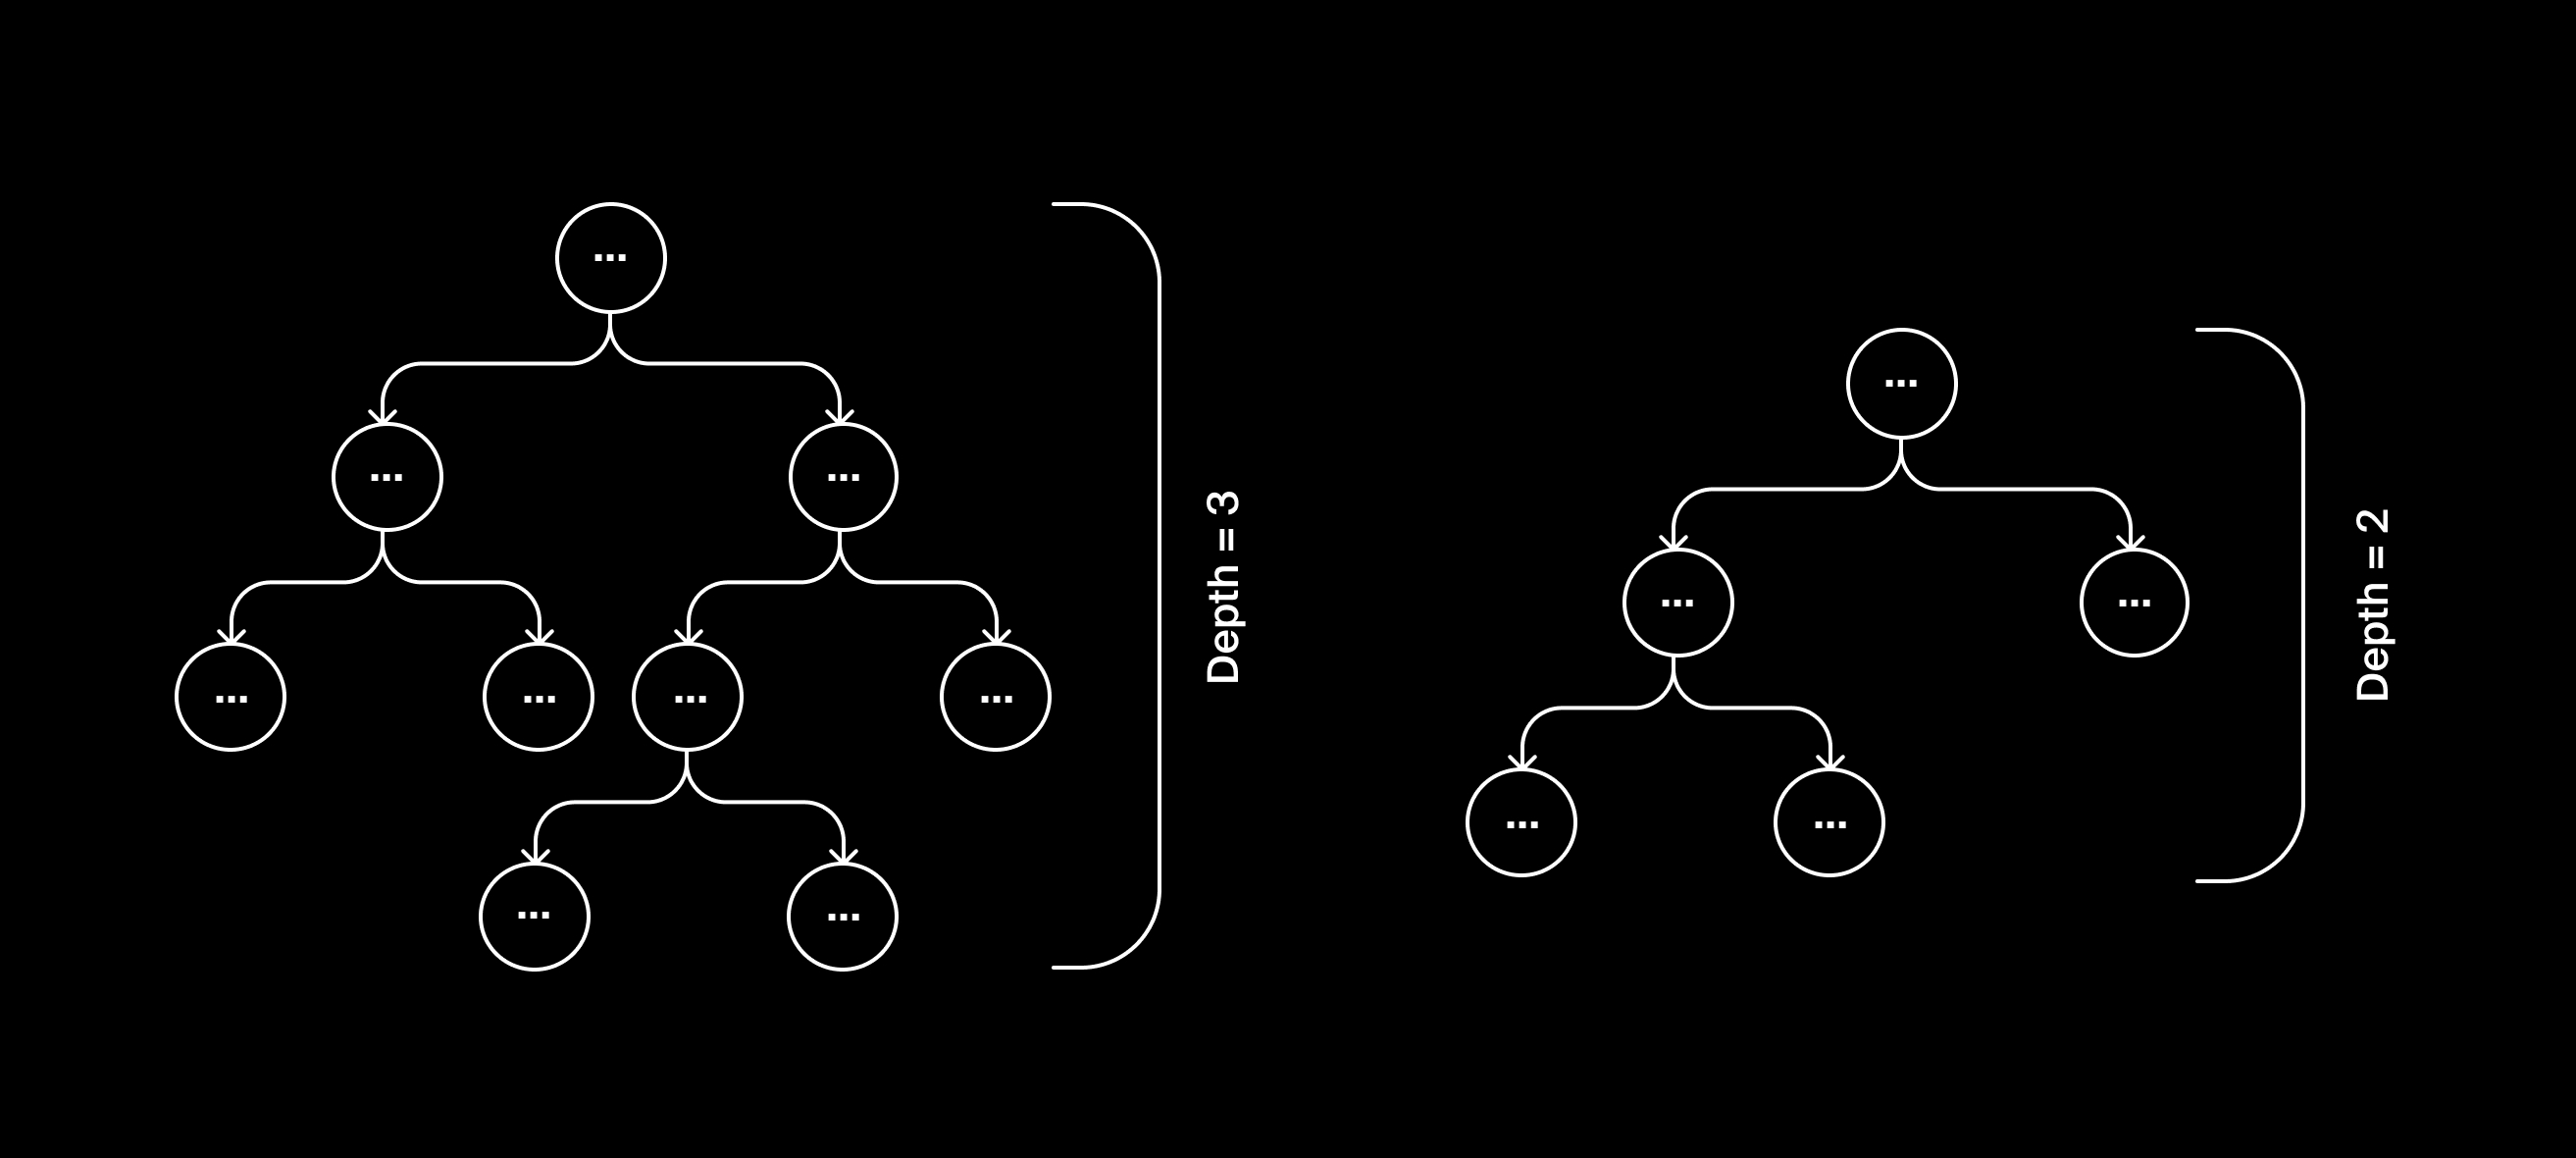

Pregunta

¿Cómo afecta la altura (profundidad) del árbol al sobreajuste o subajuste?

Una profundidad de árbol alta significa que el modelo tiende a sobreajustarse. Un árbol corto puede conducir a un subajuste.

Los árboles altos y antiguos han visto muchos veranos e inviernos, por lo que son mucho más grandes que los árboles jóvenes o los tocones (por cierto, un tocón es un árbol de decisión con una profundidad de uno). Así como los árboles reales son más pesados si son más altos, los árboles de decisión tienen más información si son más profundos.

Puedes establecer la profundidad de un árbol en sklearn con el parámetro max_depth:

#especificar la profundidad (ilimitado por defecto)
model = DecisionTreeClassifier(random_state=12345, max_depth=3)

model.fit(features, target)

### Experimentos con árboles de decisión

¿Cómo afecta exactamente la profundidad del árbol a la exactitud de la predicción? Para averiguarlo, vamos a recorrer diferentes niveles de profundidad del árbol en el algoritmo de entrenamiento.

Ahora intentaremos determinar a qué nivel de profundidad del árbol el sobreajuste empieza a afectar a la exactitud de nuestros árboles. Vamos a aumentar la profundidad máxima del árbol en uno para cada nuevo modelo, comparar los valores de exactitud en los conjuntos de entrenamiento y prueba, y ver dónde empiezan a divergir.

Haz que el programa de entrenamiento del árbol de decisión pruebe varias configuraciones del parámetro de profundidad máxima del árbol max_depth. El programa tiene que:

Iterar sobre los valores del 1 al 10.
Entrenar modelos en el conjunto de entrenamiento. No olvides especificar random_state=54321 al inicializar el constructor del modelo.

Imprimir la puntuación de exactitud de cada modelo en los conjuntos de entrenamiento y de prueba.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv('/datasets/train_data_us.csv')

df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

test_df = pd.read_csv('/datasets/test_data_us.csv')

test_df.loc[test_df['last_price'] > 113000, 'price_class'] = 1
test_df.loc[test_df['last_price'] <= 113000, 'price_class'] = 0

test_features = test_df.drop(['last_price', 'price_class'], axis=1)
test_target = test_df['price_class']

for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=54321, max_depth= depth)
    model.fit(features, target)
    train_predictions = model.predict(features)
    test_predictions = model.predict(test_features)

    print("Exactitud de max_depth igual a", depth)
    print("Conjunto de entrenamiento:", accuracy_score(target, train_predictions)) # calcula la puntuación de accuracy en el conjunto de entrenamiento
    print("Conjunto de prueba:", accuracy_score(test_target, test_predictions)) # calcula la puntuación de accuracy en el conjunto de prueba
    print()

Resultado:

Exactitud de max_depth igual a 1
Conjunto de entrenamiento: 0.8435719784449577
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 2
Conjunto de entrenamiento: 0.8435719784449577
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 3
Conjunto de entrenamiento: 0.8665127020785219
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 4
Conjunto de entrenamiento: 0.8739030023094688
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 5
Conjunto de entrenamiento: 0.891301000769823
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 6
Conjunto de entrenamiento: 0.9023864511162433
Conjunto de prueba: 0.5092592592592593

Exactitud de max_depth igual a 7
Conjunto de entrenamiento: 0.9140877598152425
Conjunto de prueba: 0.37808641975308643

Exactitud de max_depth igual a 8
Conjunto de entrenamiento: 0.930715935334873
Conjunto de prueba: 0.3950617283950617

Exactitud de max_depth igual a 9
Conjunto de entrenamiento: 0.9441108545034642
Conjunto de prueba: 0.4367283950617284

Exactitud de max_depth igual a 10
Conjunto de entrenamiento: 0.957197844495766
Conjunto de prueba: 0.3950617283950617

Es correcto!

Como puedes ver, a medida que aumenta la profundidad máxima del árbol, también lo hace la exactitud en el conjunto de entrenamiento. Sin embargo, la exactitud en el conjunto de prueba deja de mejorar después de que la profundidad de max_depth alcance 5, ¡y de hecho empeora a medida que aumenta la profundidad! El modelo con max_depth igual a 5 es también el último modelo en el que las puntuaciones de "exactitud" en ambos conjuntos son similares, por lo que podemos concluir que los modelos más profundos se ven afectados por el sobreajuste. Por eso no podemos confiar únicamente en el conjunto de entrenamiento a la hora de evaluar la calidad de nuestros modelos.